<a href="https://colab.research.google.com/github/SHAHMACP/Applications-of-Differential-Equations-/blob/main/Phase_Portrait_and_Stability_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ---------------------------------------------
# Phase Portrait and Stability Classification
# ---------------------------------------------


In [24]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Step 1: Define symbols
x, y = sp.symbols('x y')

In [26]:
# Step 2: Define your system of ODEs here
# Example 1: Simple nonlinear system
# dx/dt = y
# dy/dt = -x + 0.5*(1 - x**2)*y

f1 = y
f2 = -x + 0.5*(1 - x**2)*y   # you can edit these two equations

print('f1 :')
f1
print('f2 :' )
f2

f1 :
f2 :


-x + y*(0.5 - 0.5*x**2)

In [27]:
# Step 3: Compute equilibrium points
eq_points = sp.solve([f1, f2], (x, y))
print("Equilibrium points:")
for pt in eq_points:
    print(pt)

Equilibrium points:
(0.0, 0.0)


In [28]:
# Step 4: Compute Jacobian matrix
J = sp.Matrix([f1, f2]).jacobian([x, y])
print("\nJacobian Matrix:")
sp.pprint(J)


Jacobian Matrix:
⎡     0             1      ⎤
⎢                          ⎥
⎢                         2⎥
⎣-1.0⋅x⋅y - 1  0.5 - 0.5⋅x ⎦


In [29]:
# Step 5: Analyze each equilibrium
print("\n--- Stability Analysis ---")
for pt in eq_points:
    J_sub = J.subs({x: pt[0], y: pt[1]})
    eigs = J_sub.eigenvals()
    print(f"\nAt equilibrium {pt}:")
    for eig, mult in eigs.items():
        print(f"  Eigenvalue: {eig.evalf()}")

    # Classify based on eigenvalues
    eig_values = [complex(ev.evalf()) for ev in eigs.keys()]
    real_parts = [ev.real for ev in eig_values]
    imag_parts = [ev.imag for ev in eig_values]

    if all(r < 0 for r in real_parts) and all(i == 0 for i in imag_parts):
        print("  → Stable Node (Asymptotically Stable)")
    elif all(r > 0 for r in real_parts) and all(i == 0 for i in imag_parts):
        print("  → Unstable Node")
    elif real_parts[0]*real_parts[1] < 0:
        print("  → Saddle Point (Always Unstable)")
    elif any(i != 0 for i in imag_parts):
        if all(r < 0 for r in real_parts):
            print("  → Stable Spiral (Spiral Sink)")
        elif all(r > 0 for r in real_parts):
            print("  → Unstable Spiral (Spiral Source)")
        else:
            print("  → Center (Purely Imaginary, Neutrally Stable)")
    else:
        print("  → Complex Behavior")


--- Stability Analysis ---

At equilibrium (0.0, 0.0):
  Eigenvalue: 0.25 - 0.968245836551854*I
  Eigenvalue: 0.25 + 0.968245836551854*I
  → Unstable Spiral (Spiral Source)


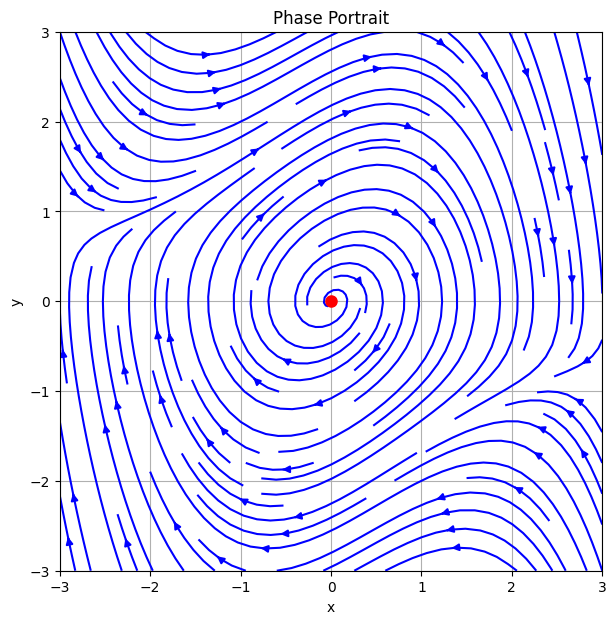

In [30]:
# Step 6: Plot Phase Portrait
f = sp.lambdify((x, y), f1, 'numpy')
g = sp.lambdify((x, y), f2, 'numpy')

x_vals = np.linspace(-3, 3, 25)
y_vals = np.linspace(-3, 3, 25)
X, Y = np.meshgrid(x_vals, y_vals)

U = f(X, Y)
V = g(X, Y)

plt.figure(figsize=(7,7))
plt.streamplot(X, Y, U, V, color='blue', density=1.2, arrowsize=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.grid(True)

# Mark equilibrium points
for pt in eq_points:
    plt.plot(float(pt[0]), float(pt[1]), 'ro', markersize=8)

plt.show()


In [31]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def analyze_phase_portrait(f1_expr, f2_expr, x_range=(-3,3), y_range=(-3,3), density=1.2):
    """
    Analyze and visualize the phase portrait of a 2D differential system:
        dx/dt = f1(x, y)
        dy/dt = f2(x, y)

    Parameters:
        f1_expr : sympy expression for dx/dt
        f2_expr : sympy expression for dy/dt
        x_range : tuple (min, max) for x-axis
        y_range : tuple (min, max) for y-axis
        density : float, streamplot line density
    """

    # Step 1: Define symbols
    x, y = sp.symbols('x y')

    # Step 2: Compute equilibrium points
    eq_points = sp.solve([f1_expr, f2_expr], (x, y), dict=True)

    print("Equilibrium Points:")
    if not eq_points:
        print("  No equilibrium points found.")
    else:
        for pt in eq_points:
            print(" ", pt)

    # Step 3: Jacobian matrix
    J = sp.Matrix([f1_expr, f2_expr]).jacobian([x, y])
    print("\n Jacobian Matrix:")
    sp.pprint(J)

    # Step 4: Stability analysis
    print("\n Stability Analysis:")
    for pt in eq_points:
        J_sub = J.subs(pt)
        eigs = J_sub.eigenvals()
        eig_values = [complex(ev.evalf()) for ev in eigs.keys()]
        real_parts = [ev.real for ev in eig_values]
        imag_parts = [ev.imag for ev in eig_values]

        print(f"\nAt equilibrium {pt}:")
        for eig in eig_values:
            print(f"  Eigenvalue: {eig}")

        # Classification rules
        if real_parts[0]*real_parts[1] < 0:
            stability = "Saddle Point (Always Unstable)"
        elif all(r < 0 for r in real_parts) and all(i == 0 for i in imag_parts):
            stability = "Stable Node (Asymptotically Stable)"
        elif all(r > 0 for r in real_parts) and all(i == 0 for i in imag_parts):
            stability = "Unstable Node"
        elif any(i != 0 for i in imag_parts):
            if all(r < 0 for r in real_parts):
                stability = "Stable Spiral (Spiral Sink)"
            elif all(r > 0 for r in real_parts):
                stability = "Unstable Spiral (Spiral Source)"
            elif all(r == 0 for r in real_parts):
                stability = "Center (Neutrally Stable)"
            else:
                stability = "Spiral / Complex behavior"
        else:
            stability = "Indeterminate"

        print("  →", stability)

    # Step 5: Plot phase portrait
    f = sp.lambdify((x, y), f1_expr, 'numpy')
    g = sp.lambdify((x, y), f2_expr, 'numpy')

    x_vals = np.linspace(x_range[0], x_range[1], 25)
    y_vals = np.linspace(y_range[0], y_range[1], 25)
    X, Y = np.meshgrid(x_vals, y_vals)

    U = f(X, Y)
    V = g(X, Y)

    plt.figure(figsize=(7,7))
    plt.streamplot(X, Y, U, V, color='blue', density=density, arrowsize=1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase Portrait')
    plt.grid(True)

    # Mark equilibrium points
    for pt in eq_points:
        plt.plot(float(pt[x]), float(pt[y]), 'ro', markersize=8)

    plt.show()


##  Van der Pol-like system

Equilibrium Points:
  {x: 0.0, y: 0.0}

 Jacobian Matrix:
⎡     0             1      ⎤
⎢                          ⎥
⎢                         2⎥
⎣-1.0⋅x⋅y - 1  0.5 - 0.5⋅x ⎦

 Stability Analysis:

At equilibrium {x: 0.0, y: 0.0}:
  Eigenvalue: (0.25-0.9682458365518543j)
  Eigenvalue: (0.25+0.9682458365518543j)
  → Unstable Spiral (Spiral Source)


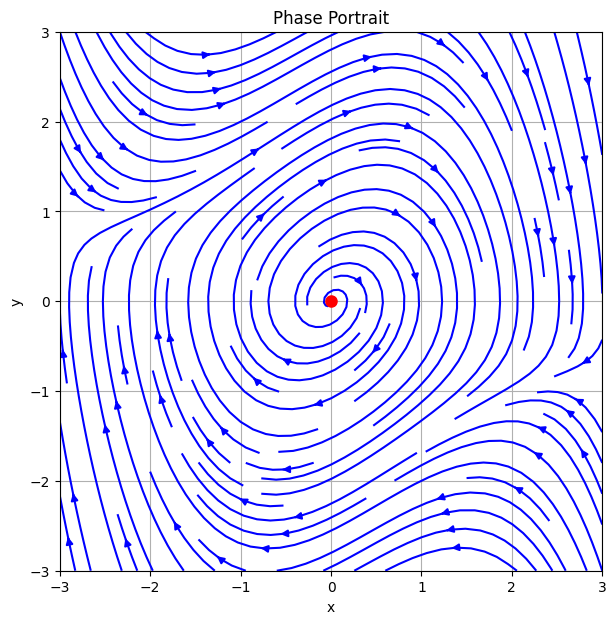

In [32]:
x, y = sp.symbols('x y')
f1 = y
f2 = -x + 0.5*(1 - x**2)*y

analyze_phase_portrait(f1, f2)


## Linear system (saddle)

Equilibrium Points:
  {x: 0, y: 0}

 Jacobian Matrix:
⎡1  0 ⎤
⎢     ⎥
⎣0  -1⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: (1+0j)
  Eigenvalue: (-1+0j)
  → Saddle Point (Always Unstable)


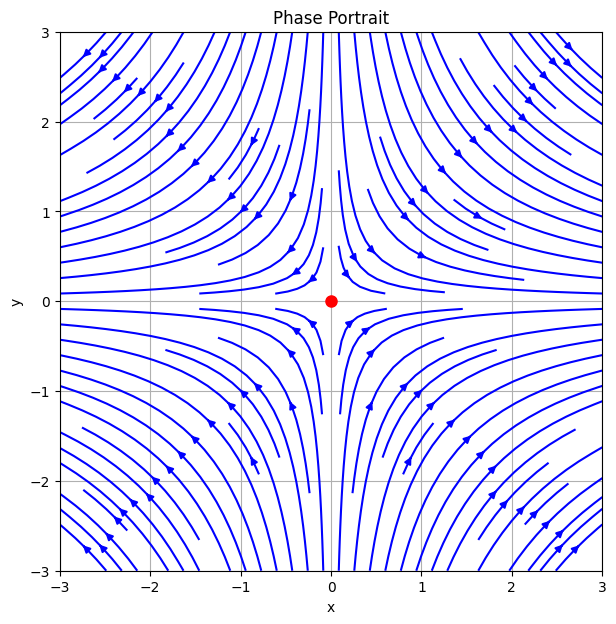

In [33]:
f1 = x
f2 = -y
analyze_phase_portrait(f1, f2)


## Spiral Source

Equilibrium Points:
  {x: 0, y: 0}

 Jacobian Matrix:
⎡0   1⎤
⎢     ⎥
⎣-1  1⎦

 Stability Analysis:

At equilibrium {x: 0, y: 0}:
  Eigenvalue: (0.5-0.8660254037844386j)
  Eigenvalue: (0.5+0.8660254037844386j)
  → Unstable Spiral (Spiral Source)


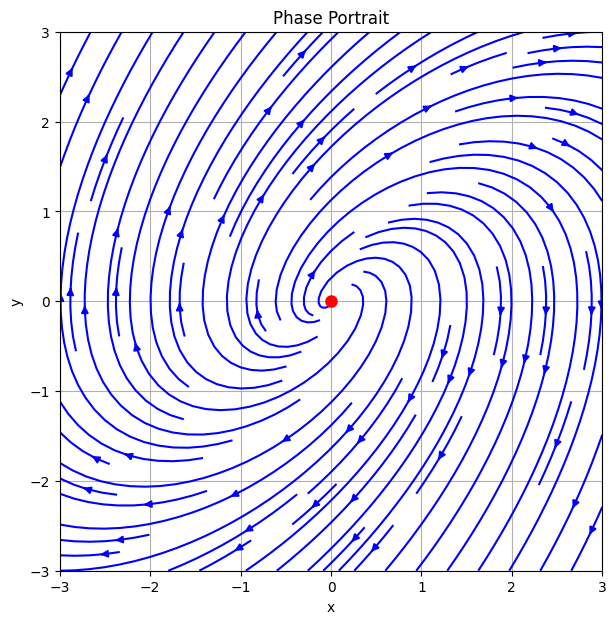

In [34]:
f1 = y
f2 = -x + y
analyze_phase_portrait(f1, f2)
